In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

# DATAFRAME : Préparation de données

DF : gpd

In [7]:
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [8]:
df_world.drop(['pop_est', 'name'], axis=1)

,continent,iso_a3,gdp_md_est,geometry
0,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...
172,Europe,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Europe,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Europe,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,North America,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


DF : ISO

In [9]:
df_iso = pd.read_excel("data/iso.xlsx")
df_iso.head()

,Pays,ISO 3166-1 alpha-3
0,Afghanistan,AFG
1,Îles Åland,ALA
2,Albanie,ALB
3,Algérie,DZA
4,Samoa américaines,ASM


In [10]:
df_iso = df_iso.rename({"ISO 3166-1 alpha-3" : "iso_a3"}, axis=1)
df_iso

,Pays,iso_a3
0,Afghanistan,AFG
1,Îles Åland,ALA
2,Albanie,ALB
3,Algérie,DZA
4,Samoa américaines,ASM
...,...,...
243,Sahara occidental,ESH
244,Yémen,YEM
245,Zambie,ZMB
246,Zimbabwe,ZWE


DF : CHIFFRE COVID

In [11]:
df_covid = pd.read_excel('data/cas_par_pays.xlsx')
df_covid

,Date,Pays,Infections,Deces,Guerisons,TauxDeces,TauxGuerison,TauxInfection
0,2021-07-08,Andorre,14050,127,13760,0.90,97.94,1.16
1,2021-07-08,Émirats Arabes Unis,645653,1849,623826,0.29,96.62,3.09
2,2021-07-08,Afghanistan,130113,5477,77280,4.21,59.39,36.40
3,2021-07-08,Antigua-et-Barbuda,1265,42,1222,3.32,96.60,0.08
4,2021-07-08,Albanie,132565,2456,130037,1.85,98.09,0.05
...,...,...,...,...,...,...,...,...
199,2021-07-08,Yémen,6936,1365,4119,19.68,59.39,20.93
200,2021-07-08,Mayotte,19425,174,2964,0.90,15.26,83.85
201,2021-07-08,Afrique du Sud,2135246,63499,1862900,2.97,87.25,9.78
202,2021-07-08,Zambie,170456,2672,152103,1.57,89.23,9.20


In [12]:
df_covid = df_covid.merge(df_iso, on="Pays")
df_covid.head()

,Date,Pays,Infections,Deces,Guerisons,TauxDeces,TauxGuerison,TauxInfection,iso_a3
0,2021-07-08,Andorre,14050,127,13760,0.90,97.94,1.16,AND
1,2021-07-08,Émirats Arabes Unis,645653,1849,623826,0.29,96.62,3.09,ARE
2,2021-07-08,Afghanistan,130113,5477,77280,4.21,59.39,36.40,AFG
3,2021-07-08,Antigua-et-Barbuda,1265,42,1222,3.32,96.60,0.08,ATG
4,2021-07-08,Albanie,132565,2456,130037,1.85,98.09,0.05,ALB


In [13]:
df_covid = df_covid.merge(df_world, on="iso_a3")
df_covid.head()

,Date,Pays,Infections,Deces,Guerisons,TauxDeces,TauxGuerison,TauxInfection,iso_a3,pop_est,continent,name,gdp_md_est,geometry
0,2021-07-08,Émirats Arabes Unis,645653,1849,623826,0.29,96.62,3.09,ARE,6072475,Asia,United Arab Emirates,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
1,2021-07-08,Afghanistan,130113,5477,77280,4.21,59.39,36.40,AFG,34124811,Asia,Afghanistan,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
2,2021-07-08,Albanie,132565,2456,130037,1.85,98.09,0.05,ALB,3047987,Europe,Albania,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,2021-07-08,Arménie,225987,4536,217381,2.01,96.19,1.80,ARM,3045191,Asia,Armenia,26300.0,"POLYGON ((46.50572 38.77061, 46.14362 38.74120..."
4,2021-07-08,Angola,39491,925,34047,2.34,86.21,11.44,AGO,29310273,Africa,Angola,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."


In [14]:
#df_covid = df_covid.drop(['Date', 'pop_est_y', 'continent_y', 'name_y', 'gdp_md_est_y', 'Pays'], axis=1)
#df_covid = df_covid.drop(['pop_est', 'gdp_md_est'], axis=1)
#df_covid.head()

In [15]:
print(df_covid.dtypes)

Date               object
Pays               object
Infections          int64
Deces               int64
Guerisons           int64
TauxDeces         float64
TauxGuerison      float64
TauxInfection     float64
iso_a3             object
pop_est             int64
continent          object
name               object
gdp_md_est        float64
geometry         geometry
dtype: object


In [16]:
print(df_covid.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Date           146 non-null    object  
 1   Pays           146 non-null    object  
 2   Infections     146 non-null    int64   
 3   Deces          146 non-null    int64   
 4   Guerisons      146 non-null    int64   
 5   TauxDeces      146 non-null    float64 
 6   TauxGuerison   146 non-null    float64 
 7   TauxInfection  146 non-null    float64 
 8   iso_a3         146 non-null    object  
 9   pop_est        146 non-null    int64   
 10  continent      146 non-null    object  
 11  name           146 non-null    object  
 12  gdp_md_est     146 non-null    float64 
 13  geometry       146 non-null    geometry
dtypes: float64(4), geometry(1), int64(4), object(5)
memory usage: 17.1+ KB
None


# GRAPHIQUE

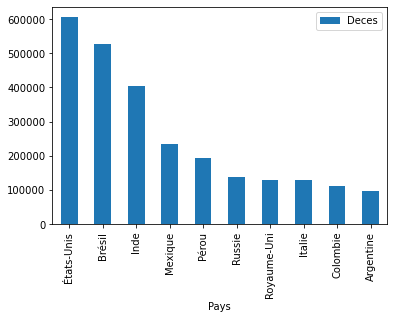

In [17]:
decesMax10 = df_covid.nlargest(10, 'Deces').plot.bar(x='Pays', y='Deces')

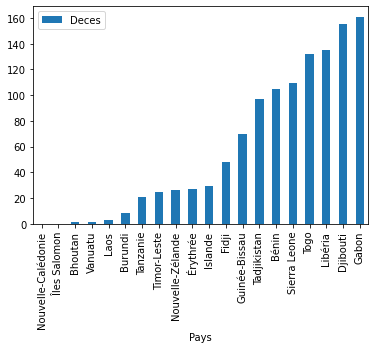

In [18]:
decesMin10 = df_covid.nsmallest(20, 'Deces').plot.bar(x='Pays', y='Deces')

In [19]:
avg_continent = df_covid[['Infections', 'Deces', 'Guerisons', 'continent']].groupby(['continent']).mean()
avg_continent

,Infections,Deces,Guerisons
continent,,,
Africa,1.297518e+05,3447.833333,1.106073e+05
Asia,1.411981e+06,20162.256410,1.337559e+06
Europe,1.226546e+06,29156.848485,7.424506e+05
North America,2.820914e+06,64268.785714,3.415857e+05
Oceania,8.539429e+03,166.000000,6.371571e+03
South America,3.055240e+06,93259.090909,2.775189e+06


<AxesSubplot:xlabel='continent'>

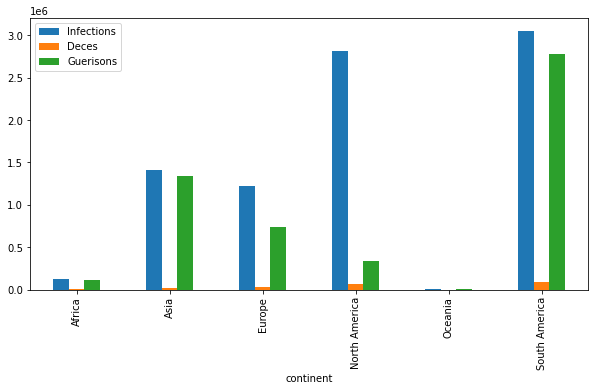

In [20]:
avg_continent.plot.bar(figsize=(10, 5))

<AxesSubplot:xlabel='continent'>

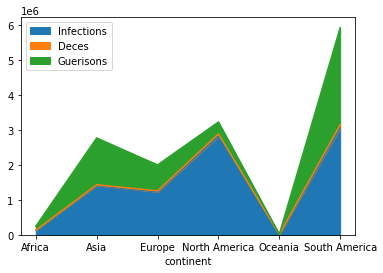

In [21]:
avg_continent.plot.area()

array([<AxesSubplot:ylabel='Infections'>, <AxesSubplot:ylabel='Deces'>,
       <AxesSubplot:ylabel='Guerisons'>], dtype=object)

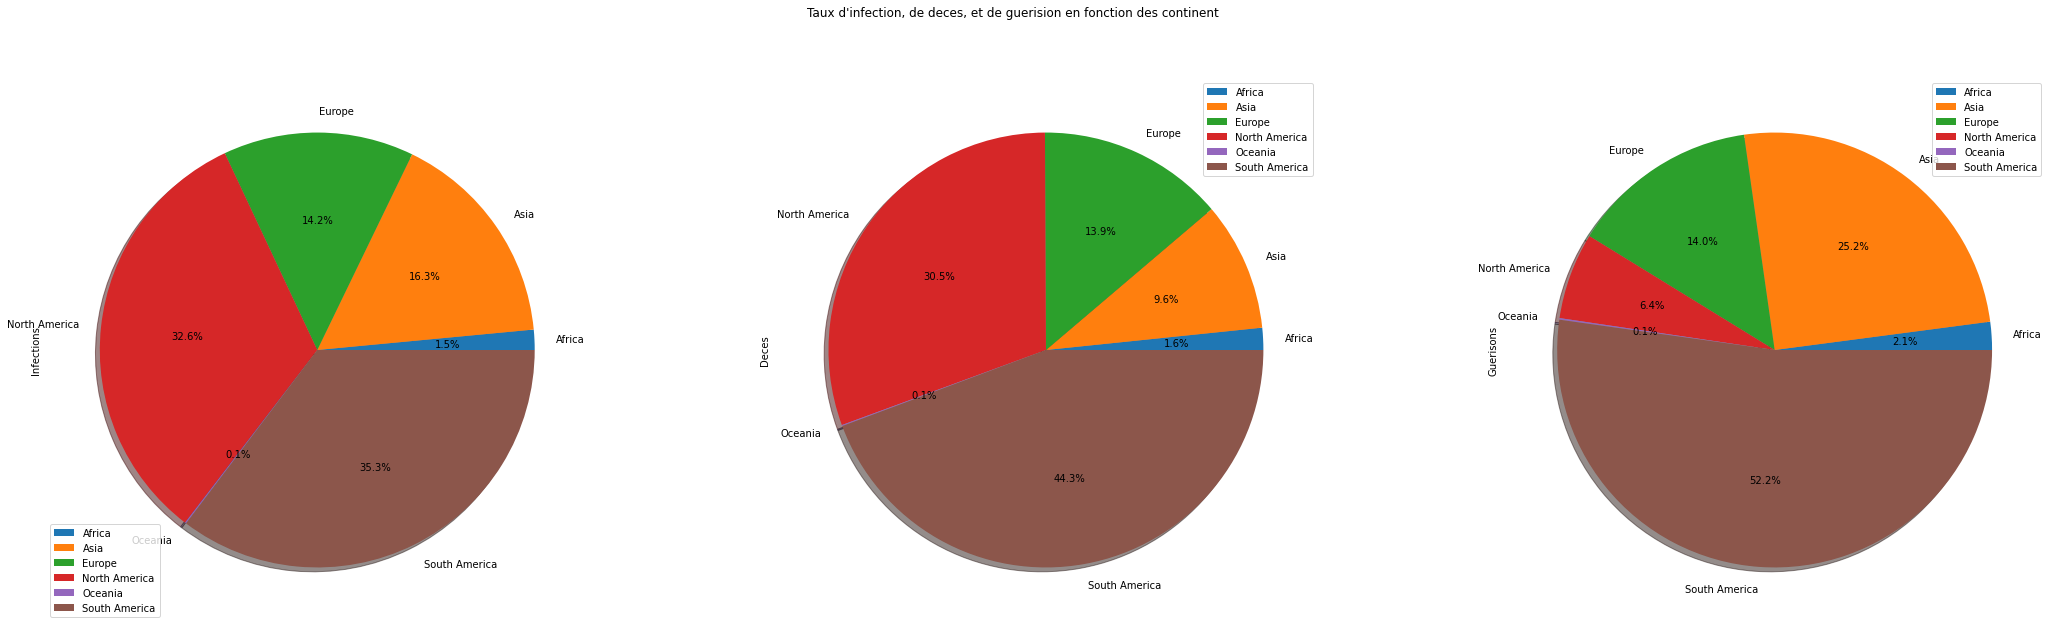

In [32]:
avg_continent.plot(subplots=True, figsize=(37,10),
                      kind='pie', 
                  #y='continent', 
                  shadow = True, 
                  #startangle=90, 
                  #figsize=(8,6), 
                  autopct='%1.1f%%' , 
                  title = "Taux d'infection, de deces, et de guerision en fonction des continent")

In [34]:
df_covid.dtypes

Date               object
Pays               object
Infections          int64
Deces               int64
Guerisons           int64
TauxDeces         float64
TauxGuerison      float64
TauxInfection     float64
iso_a3             object
pop_est             int64
continent          object
name               object
gdp_md_est        float64
geometry         geometry
dtype: object

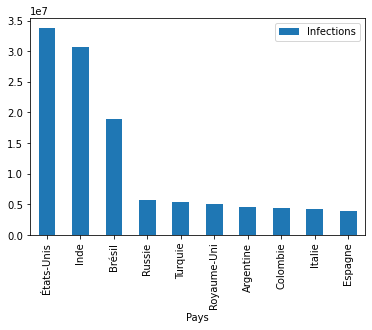

In [38]:
decesMax10 = df_covid.nlargest(10, 'Infections').plot.bar(x='Pays', y='Infections')

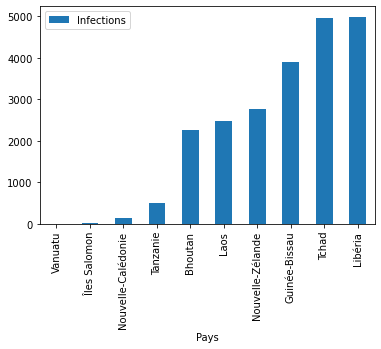

In [39]:
decesMin10 = df_covid.nsmallest(10, 'Infections').plot.bar(x='Pays', y='Infections')